# Investigate UK Policing Open Data

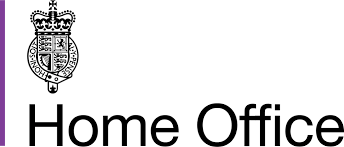

## Step 1: Install 3rd party Python libraries onto the VM running the notebook

In [ ]:
!pip install pathlib scipy pandas seaborn

## Step 2: Import libraries into the workspace

In [59]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 3: Read data into memory

First we define a function to read the data into memory. 

This function uses pattern matching to itterate through all CSV's in a directory. It then builds a Python dictionary {key: value}.
* Each key is the filename of the data which has been imported
* Each value is the dataset itself stored as a Pandas DataFrame.

In [31]:
def read_csvs_from_path(path):
    """Read csv's from a directory 
    """
    data_dict = {}
    for file in path.glob("*.csv"):
        print("Loading", file.as_posix())
        try:
            data = pd.read_csv(file.as_posix(), encoding='utf-8')
            data_dict[file.name] = data
        except:
            print('Unable to load', file.as_posix())
    return data_dict

Call the function defined above and read the data into memory.

In [32]:
data_path = Path.cwd()/"data/police/"
data_dictionary = read_csvs_from_path(path=data_path)

Loading /home/jovyan/data/police/Principal_Offence_Category_Jul.csv
Loading /home/jovyan/data/police/crime-data-2014.csv
Loading /home/jovyan/data/police/police-corruption-and-integrity-data-2014.csv
Loading /home/jovyan/data/police/victim-satisfaction-september-2014.csv
Loading /home/jovyan/data/police/anti-social-behaviour-ipsos-mori-survey-results-by-force-20101107.csv
Unable to load /home/jovyan/data/police/anti-social-behaviour-ipsos-mori-survey-results-by-force-20101107.csv
Loading /home/jovyan/data/police/domestic-abuse-force-data.csv
Loading /home/jovyan/data/police/victim-satisfaction-supplementary-data-september-2011-12-13-14.csv


## Step 4: Clean the dataset

Drop NaN/Na rows for all datasets. Not best practice in all cases, but it makes analysis simpler

In [33]:
for key in data_dictionary.keys():
    data_dictionary[key] = data_dictionary[key].dropna()

## Step 5: Examine the "Victim Satisfaction September 2014" dataset

Sense check the first 5 lines of the dataset.

In [34]:
vs = data_dictionary["victim-satisfaction-september-2014.csv"]

In [35]:
vs.head()

,Unnamed: 0,Percentage of respondents satisfied with overall service in 12 months to September 2014,Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2014,Percentage of respondents satisfied with overall service in 12 months to September 2013,Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2013,Percentage of respondents satisfied with overall service in 12 months to September 2012,Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2012,Percentage of respondents satisfied with overall service in 12 months to September 2011,Confidence Interval percentage of respondents satisfied with overall service in 12 months to September 2011
1,England and Wales,84.65958887,0.193316511,85.19290111,0.193038116,84.0170667,0.199411201,83.90741135,0.192521391
2,Avon and Somerset,86.90199853,1.204243724,88.47406666,1.126108106,86.02625194,1.151571599,88.18922215,1.001747595
3,Bedfordshire,82.98896335,0.141522058,82.72559013,0.151133387,80.62057391,1.432649175,79.98706296,1.495882465
4,Cambridgeshire,88.0226079,1.292982385,88.3886854,1.245046877,85.08982667,1.466929249,86.20820289,1.368555175
5,Cheshire,85.71085836,2.270781116,88.44768422,1.683268205,85.97406648,1.902107024,86.95894511,1.683892041


## Step 6: Rename the Headings

The headings are quite long and won't look nice on graphs and charts. To help this we can rename the columns!

In [36]:
satisfaction_columns = []
confidence_columns = []
for i, column in enumerate(vs.columns[1:]):
    if i%2==0:
        satisfaction_columns.append(column)
    else:
        confidence_columns.append(column)

In [37]:
satisfaction_columns_new = ["victim satisfaction " + column[-4:] for column in satisfaction_columns]
confidence_columns_new = ["confidence interval " + column[-4:] for column in confidence_columns]

In [38]:
og_columns = satisfaction_columns + confidence_columns + ['Unnamed: 0']
new_columns = satisfaction_columns_new + confidence_columns_new + ['Force']
columns = dict(zip(og_columns, new_columns))
vs.rename(columns=columns, inplace=True)

In [39]:
vs.head()

,Force,victim satisfaction 2014,confidence interval 2014,victim satisfaction 2013,confidence interval 2013,victim satisfaction 2012,confidence interval 2012,victim satisfaction 2011,confidence interval 2011
1,England and Wales,84.65958887,0.193316511,85.19290111,0.193038116,84.0170667,0.199411201,83.90741135,0.192521391
2,Avon and Somerset,86.90199853,1.204243724,88.47406666,1.126108106,86.02625194,1.151571599,88.18922215,1.001747595
3,Bedfordshire,82.98896335,0.141522058,82.72559013,0.151133387,80.62057391,1.432649175,79.98706296,1.495882465
4,Cambridgeshire,88.0226079,1.292982385,88.3886854,1.245046877,85.08982667,1.466929249,86.20820289,1.368555175
5,Cheshire,85.71085836,2.270781116,88.44768422,1.683268205,85.97406648,1.902107024,86.95894511,1.683892041


## Step 7: Cast the data to the correct datatypes

In [40]:
vs.dtypes

Force                       object
victim satisfaction 2014    object
confidence interval 2014    object
victim satisfaction 2013    object
confidence interval 2013    object
victim satisfaction 2012    object
confidence interval 2012    object
victim satisfaction 2011    object
confidence interval 2011    object
dtype: object

In [41]:
float_columns = vs.columns[1:]
object_columns = vs.columns[0]

In [42]:
for column in float_columns:
    vs[column] = vs[column].astype('float32')

In [43]:
vs.dtypes

Force                        object
victim satisfaction 2014    float32
confidence interval 2014    float32
victim satisfaction 2013    float32
confidence interval 2013    float32
victim satisfaction 2012    float32
confidence interval 2012    float32
victim satisfaction 2011    float32
confidence interval 2011    float32
dtype: object

## Step 8: Visualize the data

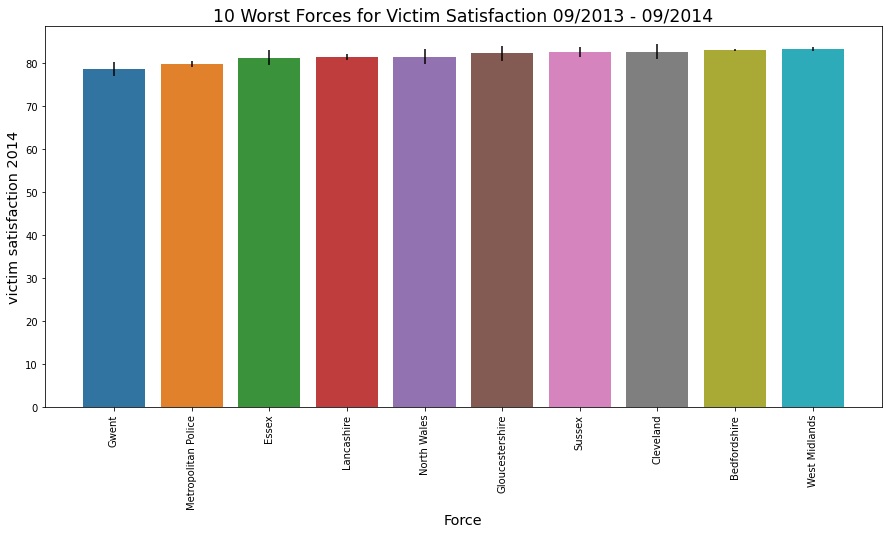

In [81]:
vs_2014 = data_dictionary["victim-satisfaction-september-2014.csv"].sort_values('victim satisfaction 2014')[0:10]
fig, ax = plt.subplots(figsize=(15, 7)) 
g = sns.barplot(x='Force', y='victim satisfaction 2014', data=vs_2014)
plt.title("10 Worst Forces for Victim Satisfaction 09/2013 - 09/2014", fontsize='xx-large')
plt.errorbar(
    x=np.arange(0, 10),
    y=vs_2014['victim satisfaction 2014'],
    yerr=vs_2014['confidence interval 2014'], 
    fmt='none', 
    c= 'k'
)
ax.xaxis.get_label().set_fontsize("x-large")
ax.yaxis.get_label().set_fontsize("x-large")
plt.xticks(rotation=90)
plt.plot();

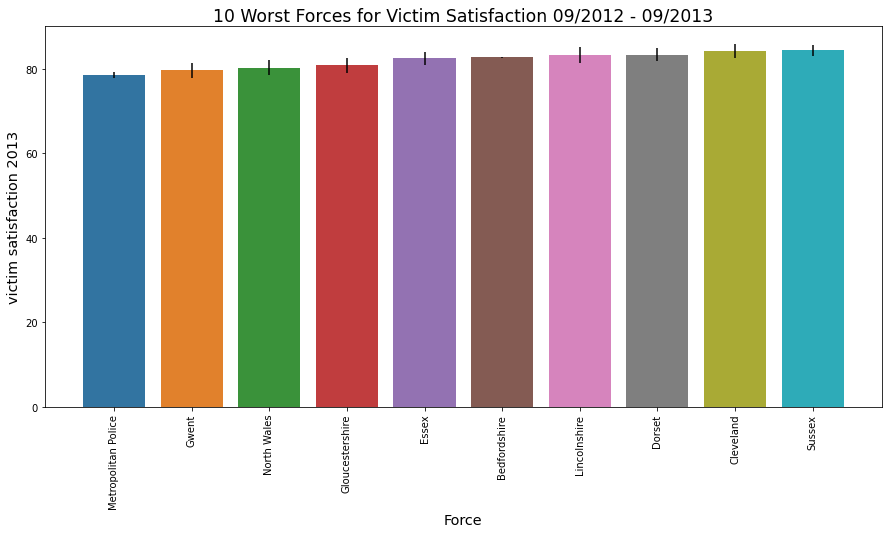

In [89]:
vs_2013 = data_dictionary["victim-satisfaction-september-2014.csv"].sort_values('victim satisfaction 2013')[0:10]
fig, ax = plt.subplots(figsize=(15, 7)) 
g = sns.barplot(x='Force', y='victim satisfaction 2013', data=vs_2013)
plt.title("10 Worst Forces for Victim Satisfaction 09/2012 - 09/2013", fontsize='xx-large')
plt.errorbar(
    x=np.arange(0, 10),
    y=vs_2013['victim satisfaction 2013'],
    yerr=vs_2013['confidence interval 2013'], 
    fmt='none', 
    c= 'k'
)
ax.xaxis.get_label().set_fontsize("x-large")
ax.yaxis.get_label().set_fontsize("x-large")
plt.xticks(rotation=90)
plt.plot();